<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Diabetes using Binary Classification**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/Machine Learning Minors/Originals/MODULE 3/preprocessed_diabetes_data (1) (1) (1).csv')

In [4]:
# View top 10 rows of the Diabetes dataset
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


In [5]:
diabetes_data.shape

(768, 9)

In [6]:
# Get the details of each column
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


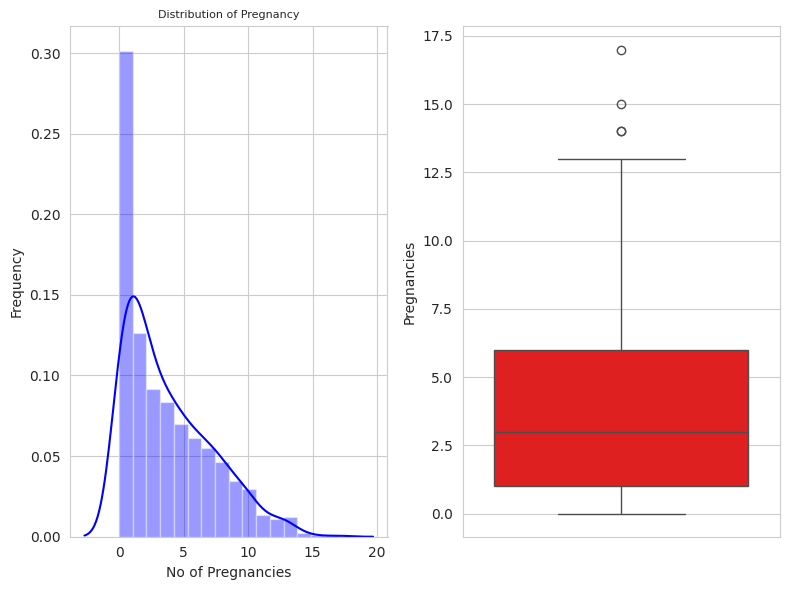

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot(data=diabetes_data['Pregnancies'], ax=axes[1],orient = 'v', color='r')
plt.tight_layout()

Task 1

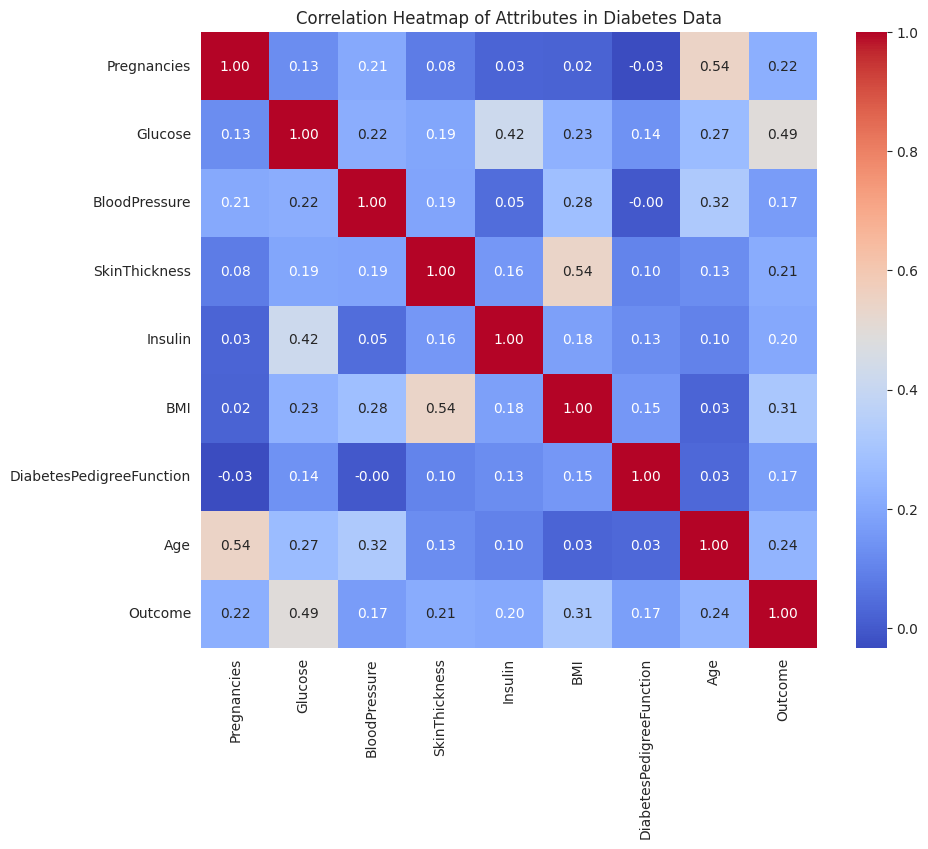

In [8]:
# Calculate the correlation matrix
correlation_matrix = diabetes_data.corr()

# Plotting the heatmap for the correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap of Attributes in Diabetes Data")
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

* Insulin is highly correlated with Glucose, BMI and Age. It means that as the values of glucose, BMI and Age increase, the insulin is also increasing. It seems logical also that overweight and elderly people might have a higher level of insulin in their bodies.  

* In the same way SkinThickness is highly correlated with BMI.

Outcome
0    500
1    268
Name: count, dtype: int64


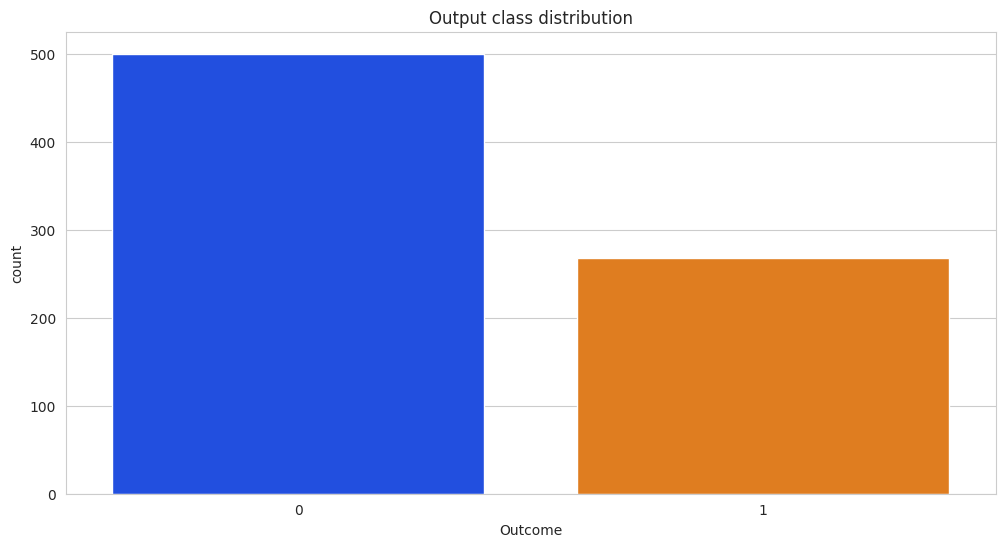

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Output class distribution")

print(diabetes_data['Outcome'].value_counts())

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A total of 768 women were registered in the database. 268 women had diabetes, while 500 women did not have diabetes.

The above graph shows that the dataset is biased towards non-diabetic people. The number of non-diabetic people is almost twice the number of diabetic patients.

Task 2

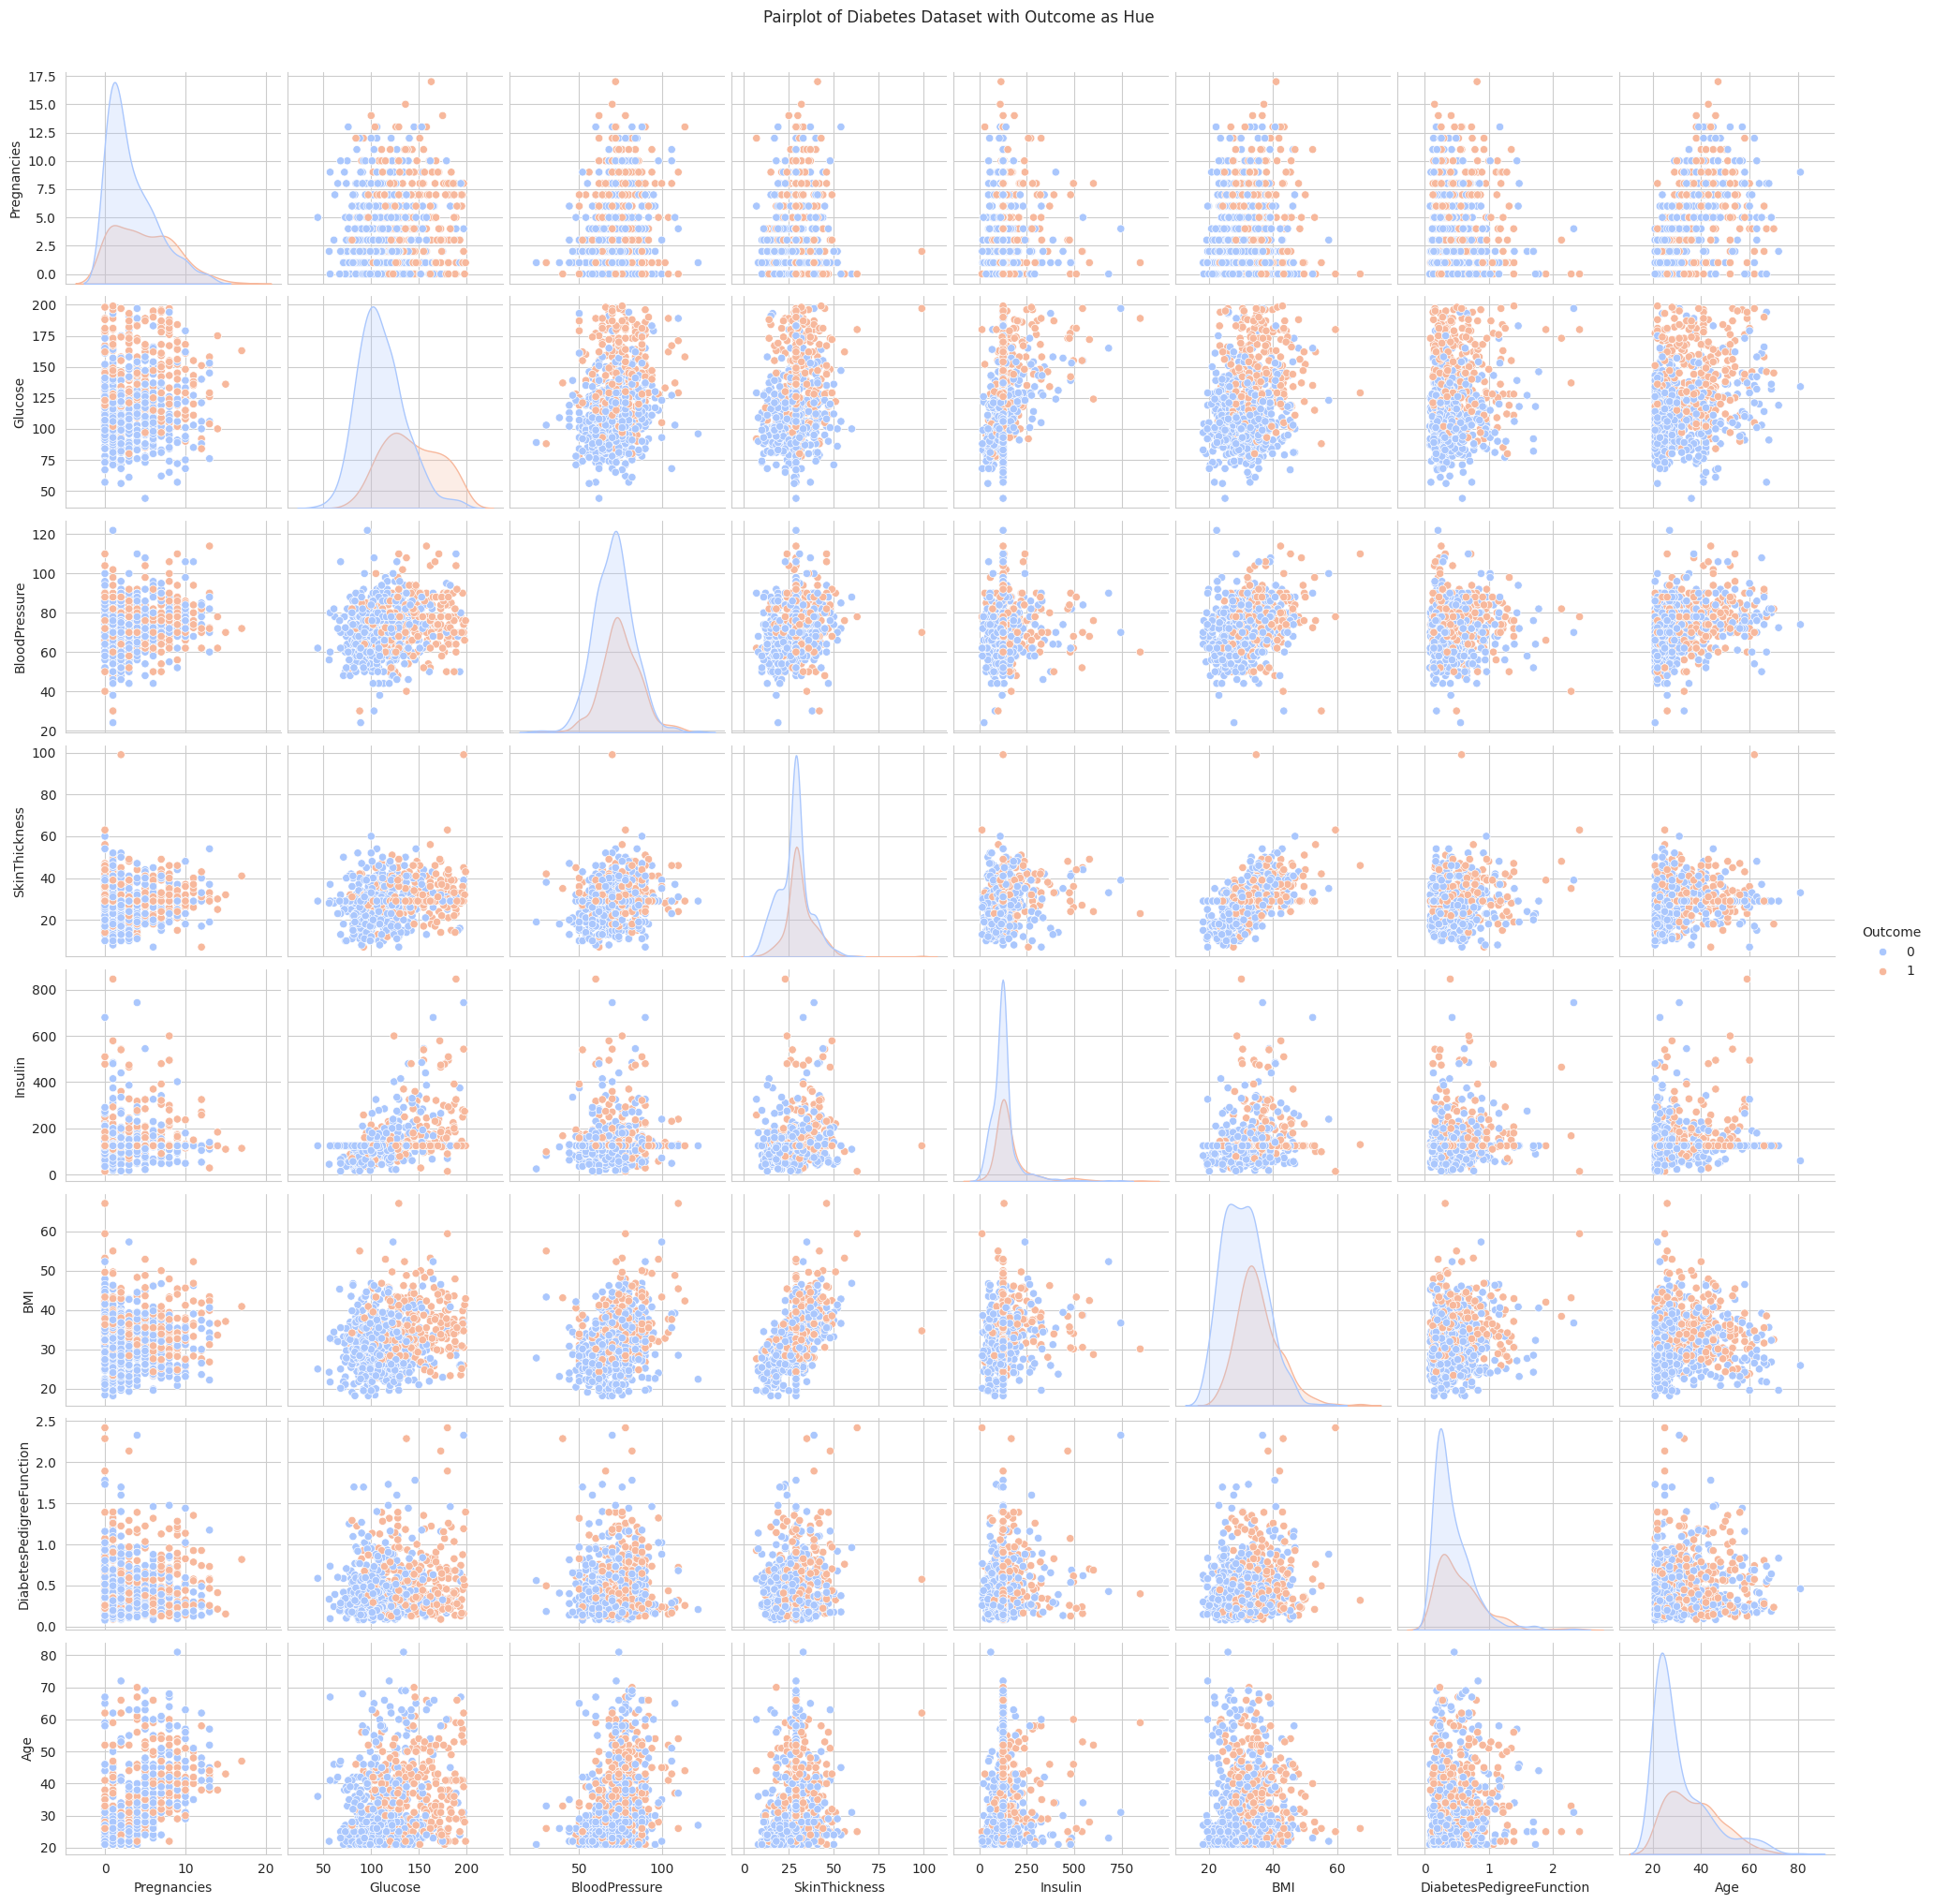

In [10]:
# Displaying a pairplot with 'Outcome' as the hue
sns.pairplot(diabetes_data, hue="Outcome", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of Diabetes Dataset with Outcome as Hue", y=1.02)
plt.show()

<Axes: xlabel='Outcome', ylabel='BMI'>

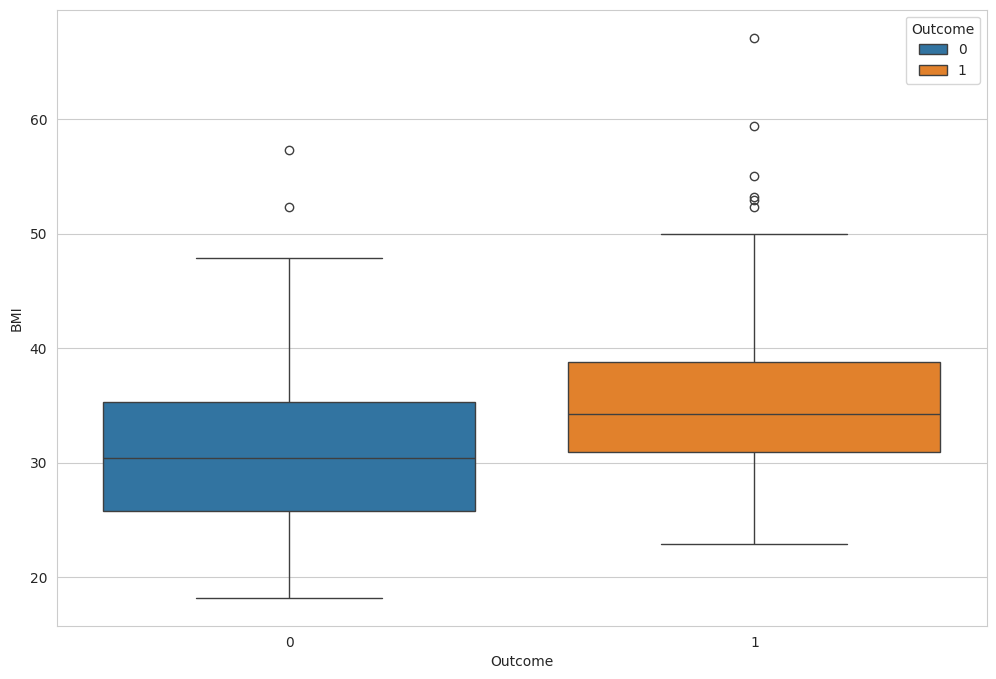

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

It is surprising that the median BMI does not significanty change as the number of pregnancies increases. Those who tested positive for diabetes had higher BMIs than those who did not. However,there is not a very large difference between the medians.

BMI might be higher for women who have had more numbers of pregnancies as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

Task 3

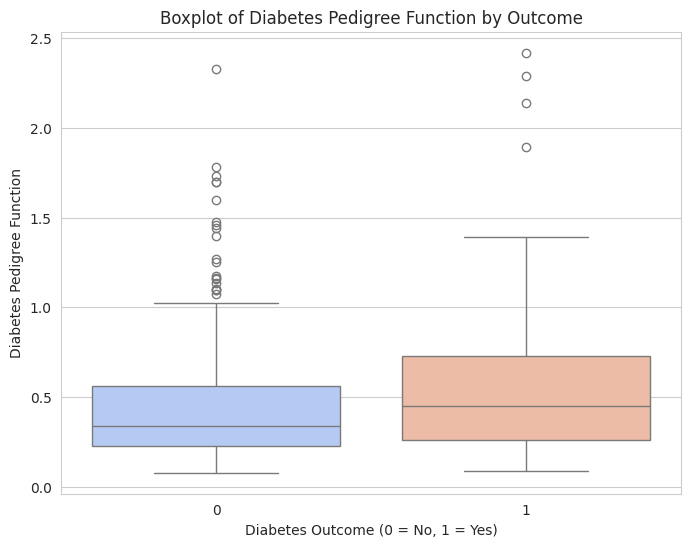

In [12]:
# Displaying a boxplot between Diabetes Pedigree Function and Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=diabetes_data, palette="coolwarm")
plt.title("Boxplot of Diabetes Pedigree Function by Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Diabetes Pedigree Function")
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>
This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to have lower pedigree functions than those who tested positive. This indicates that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring.

Task 4

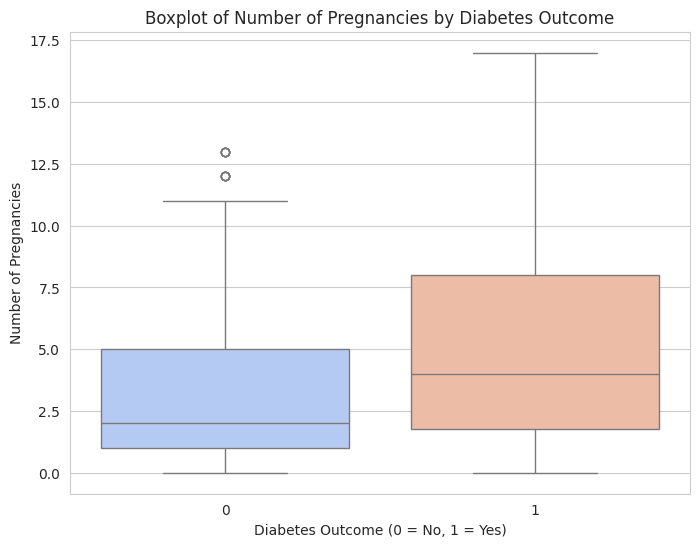

In [13]:
# Displaying a boxplot between Pregnancies and Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="Pregnancies", data=diabetes_data, palette="coolwarm")
plt.title("Boxplot of Number of Pregnancies by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Number of Pregnancies")
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The average number of pregnancies is higher in diabetic as compared to non-diabetic women.

In [14]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

,count
Outcome,
0,101
1,7


In [15]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

,count
Outcome,
0,399
1,261


In [16]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

,count
Outcome,
0,399
1,261


<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The Body Mass Index (BMI) shows a significant association with the occurrence of diabetes.  
The interquartile range for the women who tested positive reaches a higher BMI than the IQR for those who tested negative. Therefore, women could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative.


Task 5

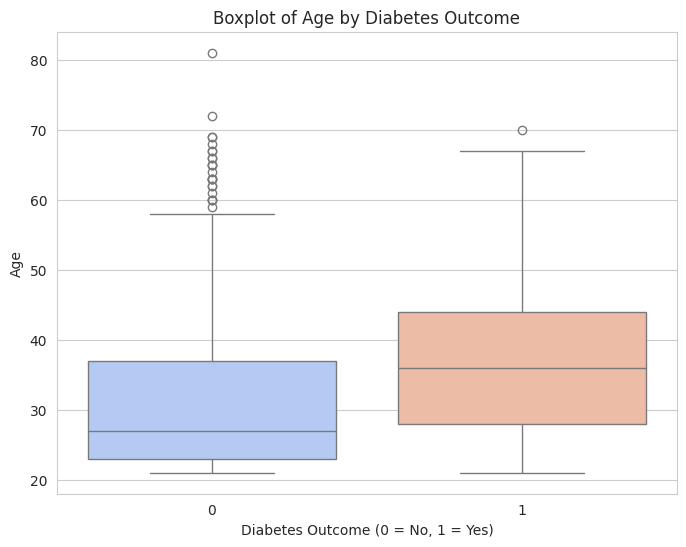

In [17]:
# Displaying a boxplot between Age and Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x="Outcome", y="Age", data=diabetes_data, palette="coolwarm")
plt.title("Boxplot of Age by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A significant relation can be seen between the age distribution and occurrence of diabetes. Women at age group > 31 years were at higher risk of getting diabetes in comparison to the younger age group.

In [18]:
unchanged_data = diabetes_data.drop('Outcome',axis=1)

In [19]:
unchanged_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

Choosing a k Value

In [21]:
def plot_KNN_error_rate(xdata, ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  ## [REQUIRED] Split the data into train and test sets in a 70:30 ratio (70% train, 30% test)
  X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=42)

  for i in range(1, 40):
      ## [REQUIRED] Complete the code in the next three lines
      knn = KNeighborsClassifier(n_neighbors=i)  # Initialize the KNN classifier with 'i' neighbors
      knn.fit(X_train, y_train)  # Fit the KNN model on the training set
      pred_i = knn.predict(X_test)  # Make predictions on the test set using KNN

      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train, y_train))
      test_scores.append(knn.score(X_test, y_test))

  plt.figure(figsize=(12, 8))
  plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
           markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()

  # Max training score and corresponding K value
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))
  print()

  # Max test score and corresponding K value
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

  return test_scores



Max train score 100.0 % and k = [1]

Max test score 73.16017316017316 % and k = [27, 28]


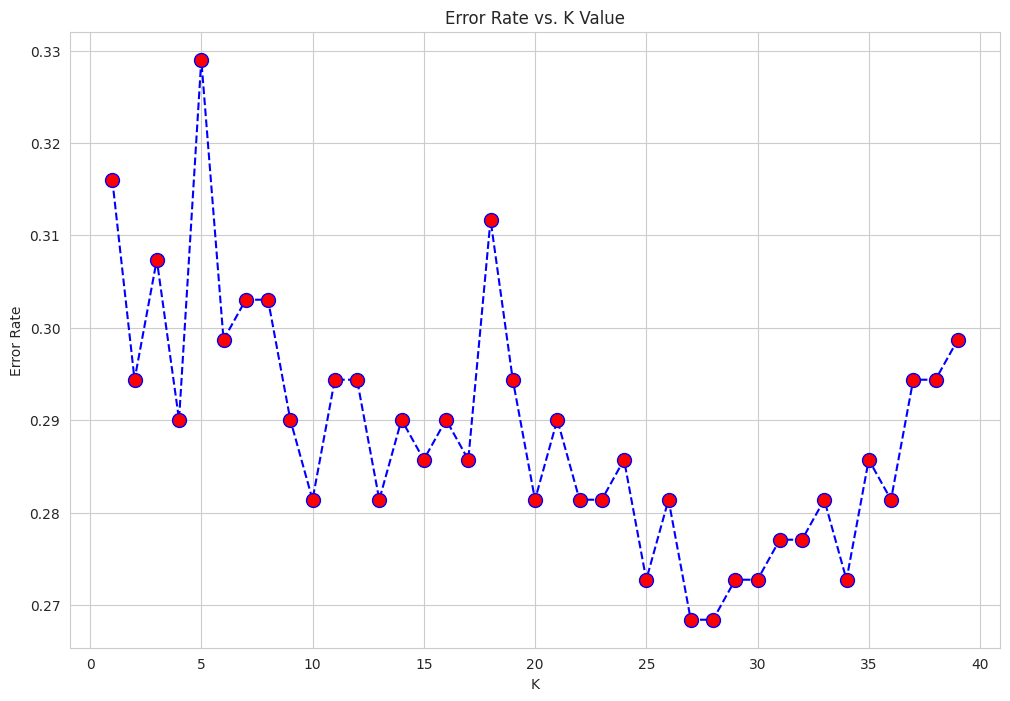

In [22]:
unchanged_test_scores = plot_KNN_error_rate(unchanged_data,diabetes_data['Outcome'])

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

StandardScaler()

In [25]:
scaled_data = scaler.transform(diabetes_data.drop('Outcome',axis=1))

In [26]:
df_feat = pd.DataFrame(scaled_data,columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496



Max train score 100.0 % and k = [1]

Max test score 75.75757575757575 % and k = [23, 24]


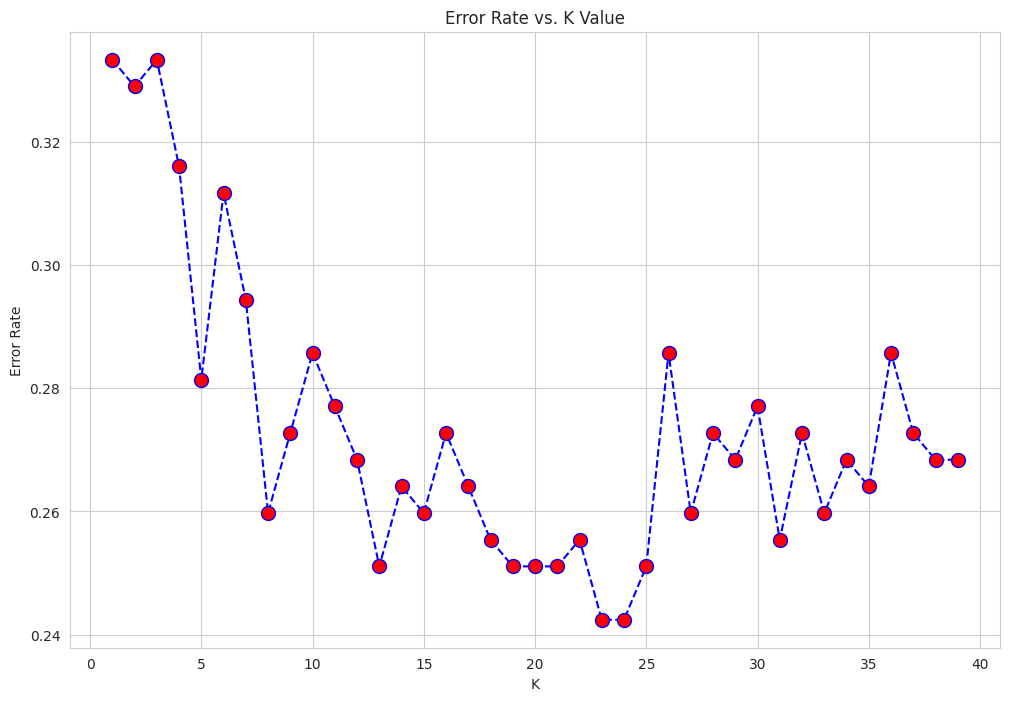

In [27]:
scaled_test_scores = plot_KNN_error_rate(scaled_data,diabetes_data['Outcome'])

<Axes: title={'center': 'Accuracy vs. K Value'}>

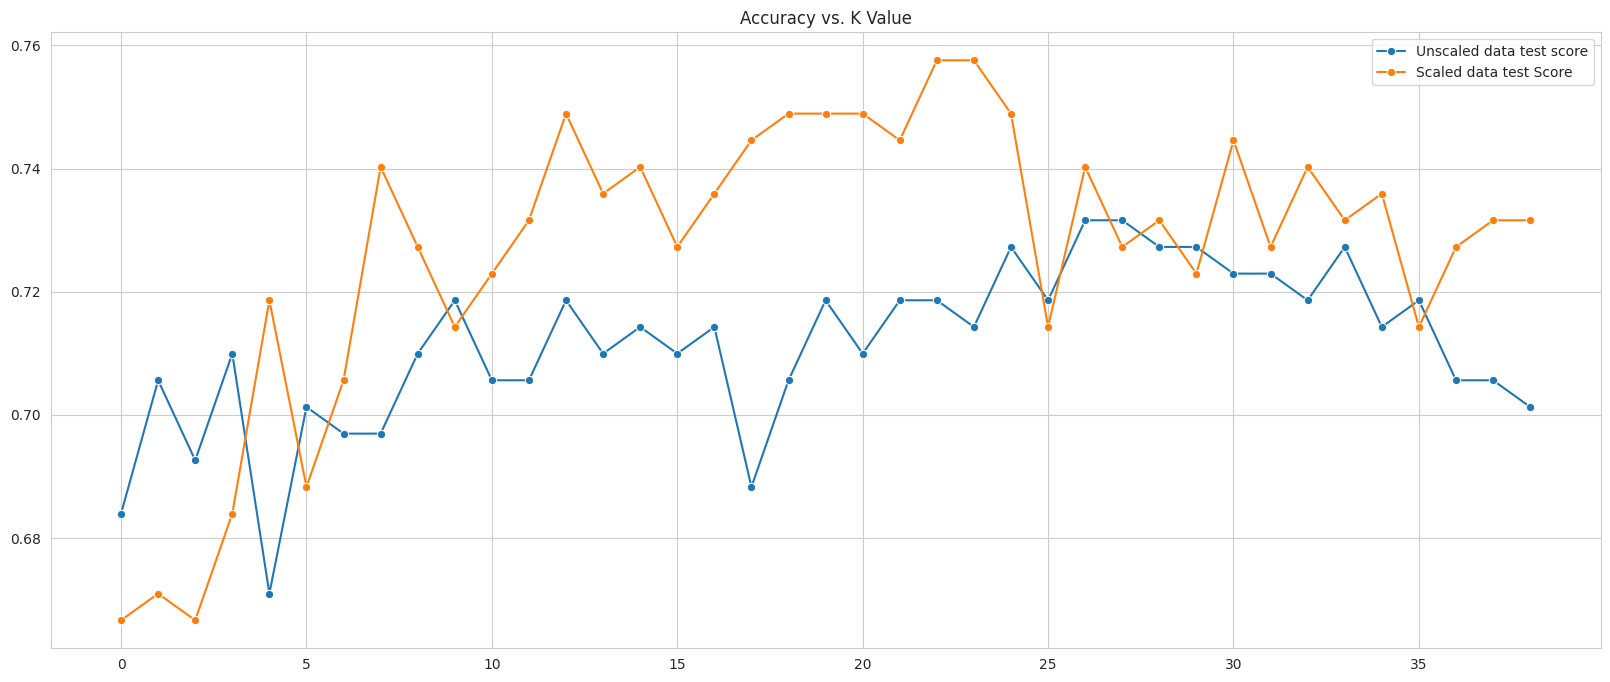

In [28]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(scaled_test_scores,marker='o',label='Scaled data test Score')

Task 7

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

def plot_KNN_error_rate_with_scaling(xdata, ydata):
    # Apply MinMax scaling
    scaler = MinMaxScaler()
    xdata_scaled = scaler.fit_transform(xdata)

    error_rate = []
    test_scores = []
    train_scores = []

    # Split the scaled data into train and test sets in a 70:30 ratio
    X_train, X_test, y_train, y_test = train_test_split(xdata_scaled, ydata, test_size=0.3, random_state=42)

    for i in range(1, 40):
        # Initialize the KNN classifier with 'i' neighbors
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)  # Fit the model on the scaled training data
        pred_i = knn.predict(X_test)  # Predict on the scaled test data

        error_rate.append(np.mean(pred_i != y_test))
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    # Plotting the error rate against K value
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value on MinMax-Scaled Data')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()

    # Print maximum train and test scores along with the best K values
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

    return test_scores


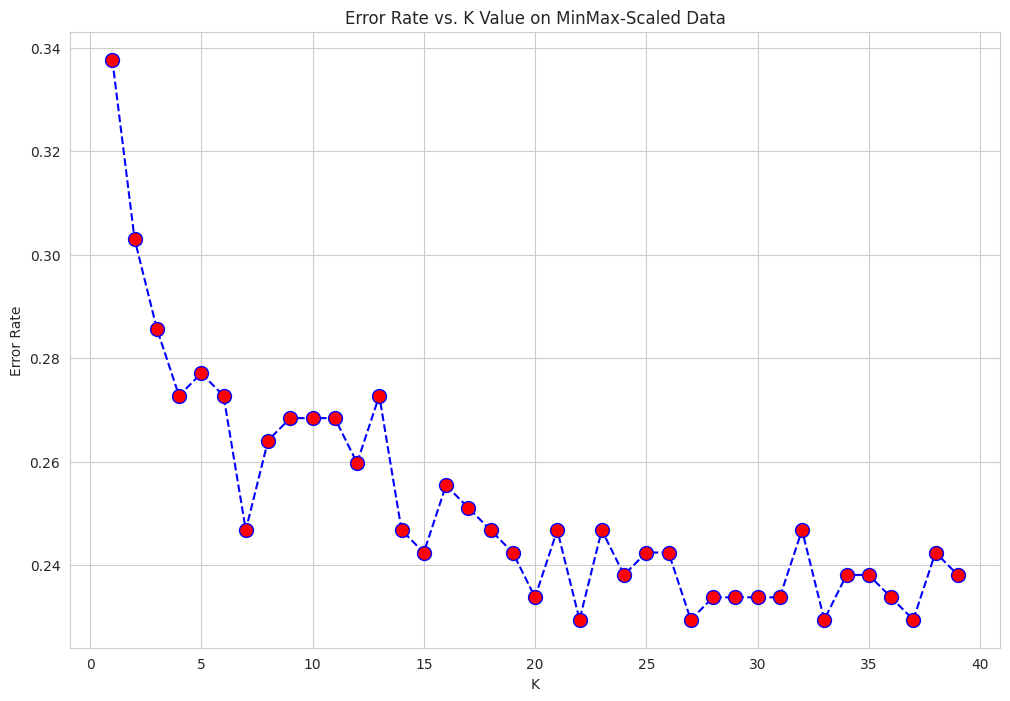

Max train score 100.0 % and k = [1]
Max test score 77.05627705627705 % and k = [22, 27, 33, 37]


In [30]:
changed_test_scores = plot_KNN_error_rate_with_scaling(unchanged_data,diabetes_data['Outcome'])

Task 8

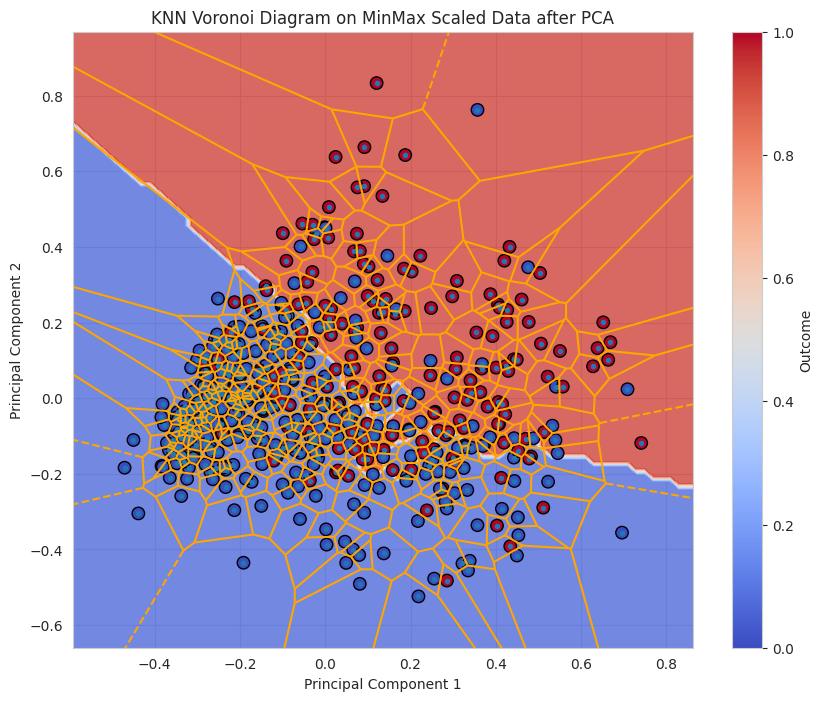

In [31]:
from sklearn.decomposition import PCA
from scipy.spatial import Voronoi, voronoi_plot_2d

# Separate features and target
X = diabetes_data.drop(columns=['Outcome'])  # All features except the target
y = diabetes_data['Outcome']

# Apply MinMax scaling on all features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN on the PCA-reduced data
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_pca, y_train)

# Create a meshgrid based on PCA components
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid using KNN
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the Voronoi diagram with decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', marker='o', s=80, cmap=plt.cm.coolwarm)
vor = Voronoi(X_train_pca)  # Create the Voronoi diagram based on PCA-reduced data
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=1.5)

plt.title("KNN Voronoi Diagram on MinMax Scaled Data after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Outcome")
plt.show()


Task 9

In [32]:
from sklearn.model_selection import KFold, cross_val_score

# Set up K-Fold cross-validation (e.g., 10 folds)
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

# 1. K-Fold Cross-Validation on Raw Data (Before Scaling)
print("K-Fold Cross-Validation on Raw Data (Before Scaling):")
accuracies_raw = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print(f"Accuracy for each fold: {accuracies_raw}")
print(f"Mean accuracy across {k} folds: {accuracies_raw.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy across {k} folds: {accuracies_raw.std() * 100:.2f}%\n")

# 2. K-Fold Cross-Validation after Scaling (Before PCA)
# Apply MinMax scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("K-Fold Cross-Validation after Scaling (Before PCA):")
accuracies_scaled = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')
print(f"Accuracy for each fold: {accuracies_scaled}")
print(f"Mean accuracy across {k} folds: {accuracies_scaled.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy across {k} folds: {accuracies_scaled.std() * 100:.2f}%\n")

# 3. K-Fold Cross-Validation after Scaling and PCA
# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

print("K-Fold Cross-Validation after Scaling and PCA:")
accuracies_scaled_pca = cross_val_score(knn, X_scaled_pca, y, cv=kf, scoring='accuracy')
print(f"Accuracy for each fold: {accuracies_scaled_pca}")
print(f"Mean accuracy across {k} folds: {accuracies_scaled_pca.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy across {k} folds: {accuracies_scaled_pca.std() * 100:.2f}%\n")


K-Fold Cross-Validation on Raw Data (Before Scaling):
Accuracy for each fold: [0.71428571 0.58441558 0.7012987  0.77922078 0.72727273 0.64935065
 0.74025974 0.76623377 0.64473684 0.64473684]
Mean accuracy across 10 folds: 69.52%
Standard deviation of accuracy across 10 folds: 5.92%

K-Fold Cross-Validation after Scaling (Before PCA):
Accuracy for each fold: [0.72727273 0.75324675 0.67532468 0.79220779 0.75324675 0.67532468
 0.75324675 0.77922078 0.64473684 0.75      ]
Mean accuracy across 10 folds: 73.04%
Standard deviation of accuracy across 10 folds: 4.64%

K-Fold Cross-Validation after Scaling and PCA:
Accuracy for each fold: [0.68831169 0.74025974 0.66233766 0.74025974 0.75324675 0.68831169
 0.72727273 0.68831169 0.78947368 0.71052632]
Mean accuracy across 10 folds: 71.88%
Standard deviation of accuracy across 10 folds: 3.64%

